# Agrupando os dados do modelo



1. Vamos reduzir a dimensão usando t-SNE: isso é para vermos, intuitivamente, qual o número "ótimo" de clusters dos dados

2. Vamos usar o algoritmo KMeans para agrupar nossos dados. Primeiro faremos 1 cluster apenas e depois vamos aumentando o número de clusters até chegar ao "ótimo"

## t-SNE

https://github.com/zhmz90/BHTsne.jl Julia não consegue instalar esse pacote porque houve uma mudança no "Pkg.add()" e o repositório está configurado para a versão anterior

https://github.com/lejon/TSne.jl Usando este.

Na verdade, vou usar o pacote TSne e usar o código do BHTSne, pois este usa Gadfly

### Interpretação


https://distill.pub/2016/misread-tsne/

O importante é usar parâmetro "perplexity" adequado para ele gerar os clusters.

Precauções:
1. Tamanho dos clusters ou distancia entre eles pode significar nada
2. O algoritmo usa escolhas aleatórias, então podemos ter resultados diferentes a cada vez que rodamos o código. Solução para isso: rodar o código várias vezes para ter certeza que convergiu

Logo, para o nosso caso, não há problema. Queremos saber apenas quantos clusters existem. Não iremos interpretar o formato das imagens ou algo do gênero.

In [1]:
using Pkg

In [2]:
using TSne, RDatasets, Gadfly

Computing t-SNE 45%|█████████████████                   |  ETA: 0:00:00
4m  KL_divergence:  0.1896
Computing t-SNE100%|████████████████████████████████████| Time: 0:00:00
  KL_divergence:  0.1870


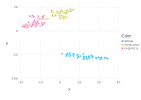

In [3]:
iris = dataset("datasets","iris")
X = convert(Matrix{Float64}, iris[:, 1:4])
labels = iris[:, 5]
plotname = "iris"
initial_dims = -1
iterations = 1500
perplexity = 15


#o que significa esse 2 aqui?
# Y = tsne(X, 2, initial_dims, iterations, perplexity)
Y = tsne(X, 3, initial_dims, iterations, perplexity)

theplot = plot(x=Y[:,1], y=Y[:,2], color=labels)

### PCA


Versão estável do pacote em Julia

https://multivariatestatsjl.readthedocs.io/en/stable/pca.html



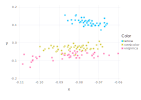

In [4]:
using MultivariateStats

pca_y = fit(PCA, X, maxoutdim=3)
Y = projection(pca_y)

plot(x = Y[:,1], y=Y[:,2], color=labels)

## KMeans

In [5]:
using Clustering

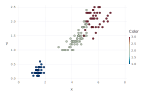

In [6]:
features = collect(Matrix(iris[:, 1:4])'); # features to use for clustering




nclusters = 3

result = kmeans(features, nclusters)
theplot = plot(x=iris.PetalLength, y=iris.PetalWidth, 
    color=result.assignments)

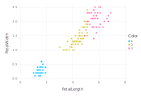

In [7]:
#melhorando o gráfico com meus recém-adquiridos conhecimentos de Gadfly
theplot = plot(iris, x=:PetalLength, y=:PetalWidth, 
    color=result.assignments,
    Scale.color_discrete(levels=[1, 2, 3]))

## Dados do projeto

Agora vamos ler os dados do projeto e refazer os passos do exemplo acima

In [9]:
using CSV, DataFrames

In [168]:
dfdata_clusters = DataFrame(CSV.File("data_clusters.csv"));

data_clusters = convert(Matrix, dfdata_clusters);

In [172]:
dfdata_clusters[:,end-2:end]

75×3 DataFrame
│ Row │ Dj_D     │ L_D       │ Vh_D     │
│     │ Float64  │ Float64   │ Float64  │
├─────┼──────────┼───────────┼──────────┤
│ 1   │ 0.488529 │ 3.11008   │ 3.35731  │
│ 2   │ 0.907601 │ 0.0588918 │ 1.038    │
│ 3   │ 0.717206 │ 0.221813  │ 0.780715 │
│ 4   │ 0.988443 │ 0.270958  │ 0.408618 │
│ 5   │ 0.267987 │ 0.138889  │ 0.459942 │
│ 6   │ 0.626253 │ 0.142788  │ 0.997802 │
│ 7   │ 0.989725 │ 0.0124127 │ 0.183513 │
│ 8   │ 0.525784 │ 0.0978916 │ 0.389632 │
│ 9   │ 0.77157  │ 0.213436  │ 0.262722 │
│ 10  │ 0.868998 │ 0.0527203 │ 2.69722  │
⋮
│ 65  │ 0.814735 │ 0.503345  │ 1.09464  │
│ 66  │ 0.769713 │ 0.774476  │ 1.73897  │
│ 67  │ 0.881162 │ 0.0210458 │ 0.170457 │
│ 68  │ 0.913985 │ 0.561358  │ 2.87429  │
│ 69  │ 0.780067 │ 0.384619  │ 1.11724  │
│ 70  │ 0.588999 │ 0.173915  │ 1.90851  │
│ 71  │ 0.924433 │ 0.0688475 │ 1.1282   │
│ 72  │ 0.724355 │ 0.359727  │ 1.42345  │
│ 73  │ 0.360566 │ 0.478906  │ 2.08951  │
│ 74  │ 0.863435 │ 1.26277   │ 3.3925   │
│ 75  │ 0.747392 │ 0.0265954 │ 1.3448   │

Gráficos de Vh/D vs L/D

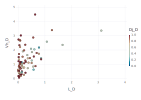

In [12]:
#gráfico sem escalas
plot(data_clusters, x=:L_D, y=:Vh_D, color=:Dj_D)

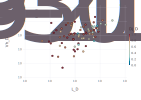

In [13]:
#mesmo gráfico acima, mas em escala logaritmica
plot(data_clusters, x=:L_D, y=:Vh_D, color=:Dj_D, 
Scale.x_log10, Scale.y_log10)

Gráficos de Vh/D vs Dj/D

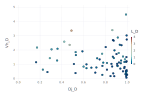

In [14]:
#gráfico do Vh_D vs Dj_D
plot(data_clusters, x=:Dj_D, y=:Vh_D, color=:L_D)

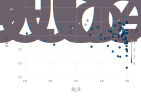

In [15]:
#mesmo gráfico acima, mas em escala logaritmica
plot(data_clusters, x=:Dj_D, y=:Vh_D, color=:L_D, 
Scale.x_log10, Scale.y_log10)

t-SNE

In [1]:
#visualização com t-sne

X = convert(Matrix{Float64}, data_clusters[end-2:end]) #pega as últimas 3 colunas


initial_dims = -1
iterations = 10000
perplexity = 65



Y = tsne(X, 2, initial_dims, iterations, perplexity)
theplot = plot(x=Y[:,1], y=Y[:,2])

#cada iteração dá um resultado diferente. Olhar com calma depois

LoadError: UndefVarError: data_clusters not defined

PCA

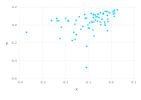

In [73]:
pca_y = fit(PCA, X, maxoutdim=2)
Y = projection(pca_y)

plot(x = Y[:,1], y=Y[:,2])

KMeans

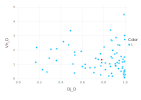

In [125]:
#agrupamento conforme KMeans
#primeiro para 1 cluster

#DUV: não entendi porque ele usa a matriz transposta aqui
features = collect(Matrix(data_clusters[:, end-2:end])'); # features to use for clustering



nclusters = 1

result = kmeans(features, nclusters)


#criando uma dataframe com os centros dos clusters
df = DataFrame(result.centers')
df = select(df, "x1" => "Dj_D", "x2" => "L_D", "x3" => "Vh_D")



theplot = plot(layer(data_clusters, x=:Dj_D, y=:Vh_D, 
    color=result.assignments),
                layer(x=df.Dj_D, y=df.Vh_D, Theme(default_color=color("red")), Geom.point))

push!(theplot, Scale.color_discrete)
#falta exportar o dado em csv aqui para ler depois!

In [119]:
#o que é total cost? variância total?
result.totalcost

79.35037975433988

In [39]:
#o centro do result é o dado que irá ser usado para a estimação

#Dj/D, L/D, Vh/D
result.centers'

1×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.780221  0.32182  1.32567

In [92]:
#exportando os dados
CSV.write("nclusters_centers.csv", df)

"nclusters_centers.csv"

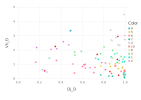

In [124]:
#agrupamento conforme KMeans
#agora para n clusters

#DUV: não entendi porque ele usa a matriz transposta aqui
features = collect(Matrix(data_clusters[:, end-2:end])'); # features to use for clustering



nclusters = 10

result = kmeans(features, nclusters)


#criando uma dataframe com os centros dos clusters
df = DataFrame(result.centers')
df = select(df, "x1" => "Dj_D", "x2" => "L_D", "x3" => "Vh_D")



theplot = plot(layer(data_clusters, x=:Dj_D, y=:Vh_D, 
    color=result.assignments),
                layer(x=df.Dj_D, y=df.Vh_D, Theme(default_color=color("red")), Geom.point))

push!(theplot, Scale.color_discrete)

#falta exportar o dado em csv aqui para ler depois!

In [21]:
result.centers'

10×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.92999   0.159598  2.79669
 0.902464  0.077426  0.377748
 0.90832   0.185143  1.02418
 0.406847  0.725329  1.98869
 0.607985  2.0112    3.03645
 0.989101  0.632209  4.48349
 0.518182  0.340583  0.700926
 0.414453  0.23066   1.10922
 0.850598  0.350542  1.53016
 0.831065  0.153579  2.1596

In [22]:
result.converged

true

In [23]:
#número de observações por cluster
result.counts

#ideia: usar nclusters tal que o número de observações em cada um seja maior que 1?

10-element Array{Int64,1}:
  5
 18
 16
  7
  3
  1
  6
  4
 10
  5

In [24]:
result.totalcost

8.39799767203196

## To-do

1. Entender por que o t-SNE não está convergindo

~2. Exportar o resultado dos centros dos clusters em csv~

3. Entender melhor o PCA